# Boston Housing

|                |   |
:----------------|---|
| **Nombre**     David Alejandro Rangel Rodríguez|   |
| **Fecha**     29 de enero del 2026 |   |
| **Expediente*756203* |   |

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [26]:
Btn = pd.read_excel('Boston Housing Dataset 1978.xlsx')
Btn

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [27]:
for name in ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]:
    min_col = Btn[name].min()
    Btn[name] = Btn[name] - min_col
    max_col = Btn[name].max()
    Btn[name] = Btn[name] / max_col 

Btn.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,452.000000
mean,0.127346,0.132953,0.331837,0.140765,0.103374,0.125663,0.582702,0.220534,0.115885,0.461954,0.101484,0.838346,0.300116,23.750442
std,0.240726,0.230487,0.258458,0.312765,0.237730,0.282253,0.334848,0.283180,0.306078,0.261537,0.222128,0.316008,0.185585,8.808602
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.300000
25%,0.004961,0.000000,0.124009,0.000000,0.009238,0.024891,0.312179,0.056885,0.004511,0.338448,0.036520,0.919550,0.157512,18.500000
50%,0.014514,0.000000,0.250901,0.000000,0.022084,0.028635,0.648503,0.122265,0.006015,0.415171,0.041339,0.984265,0.264688,21.950000
75%,0.082237,0.181000,0.652487,0.000000,0.037818,0.035131,0.898597,0.227476,0.034586,0.554140,0.044636,0.996760,0.406518,26.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50.000000


              CRIM            ZN         INDUS  CHAS           NOX  \
mean -8.425408e-17 -4.212704e-17 -6.319056e-17   0.0  8.425408e-17   
std   1.000000e+00  1.000000e+00  1.000000e+00   1.0  1.000000e+00   

                RM           AGE           DIS  RAD           TAX  PTRATIO  \
mean -2.808469e-17  4.914821e-16 -2.808469e-17  0.0 -2.457411e-16      0.0   
std   1.000000e+00  1.000000e+00  1.000000e+00  1.0  1.000000e+00      1.0   

                 B         LSTAT  
mean  5.616939e-17 -8.600937e-17  
std   1.000000e+00  1.000000e+00  


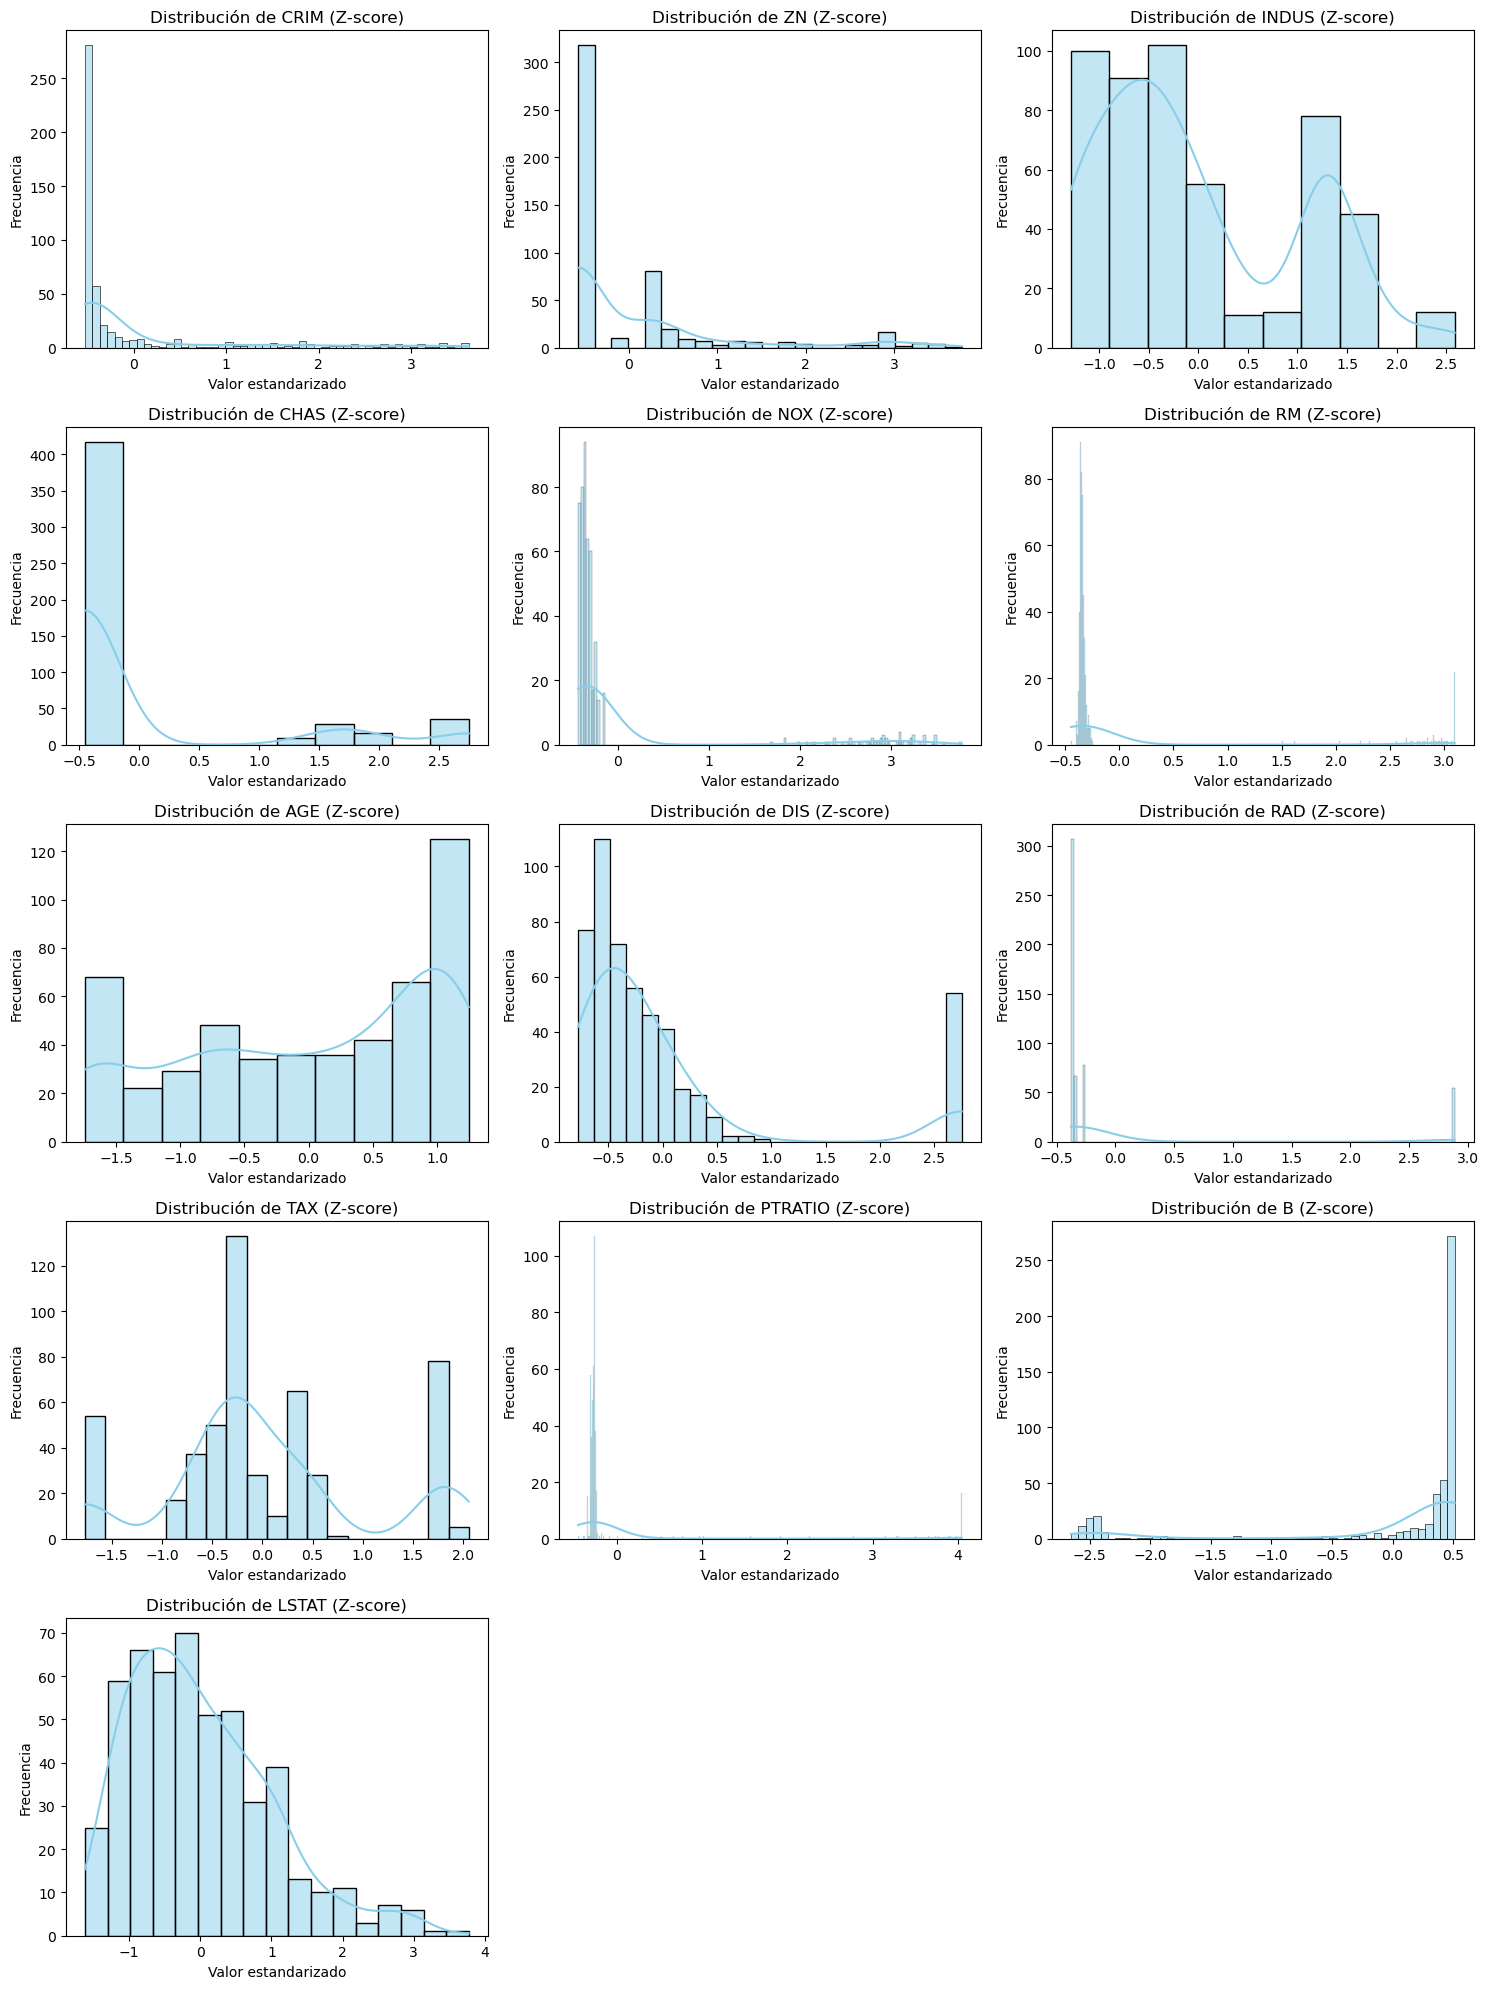

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]

#Estandarización Z 
Btn_z = Btn.copy()
for col in features:
    mean_val = Btn_z[col].mean()
    std_val = Btn_z[col].std()
    Btn_z[col] = (Btn_z[col] - mean_val) / std_val

# Mostrar estadísticas para verificar (Media ~ 0, Std ~ 1)
print(Btn_z[features].describe().loc[['mean', 'std']])

#Histogramas para visualización
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.histplot(Btn_z[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribución de {col} (Z-score)')
    axes[i].set_xlabel('Valor estandarizado')
    axes[i].set_ylabel('Frecuencia')

# Eliminar subtramas vacías si las hay
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()